In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve


In [ ]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [ ]:
rf_model = RandomForestClassifier(random_state=17)

In [ ]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
  train_score, test_score = validation_curve(model, X = X, y = y,
                                           param_name = param_name,
                                           param_range = param_range,
                                           scoring=scoring,
                                           cv = cv)
  mean_train_score = np.mean(train_score, axis=1)
  mean_test_score = np.mean(test_score, axis=1)

  plt.plot(param_range, mean_train_score,
           label="Training Score", color="b")
  
  plt.plot(param_range, mean_test_score,
           label="Validation Score", color="r")
  
  plt.title(f"Validation Curve for {type(model).__name__}")
  plt.xlabel(f"Number of {param_name}")
  plt.ylabel(f"{scoring}")
  plt.tight_layout()
  plt.legend(loc="best")
  plt.show(block=True)

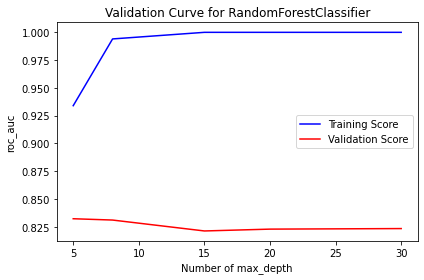

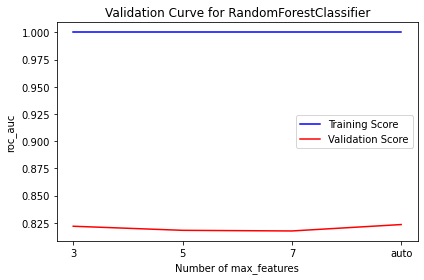

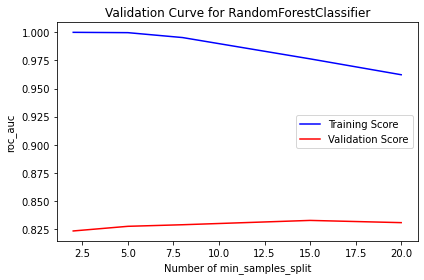

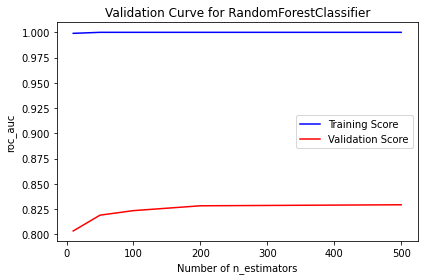

[5, 8, 15, 20, 30, None]

In [ ]:
rf_val_params =[["max_depth",[5, 8, 15, 20, 30, None]],
                ["max_features",[3, 5, 7, "auto"]],
                ["min_samples_split", [2, 5, 8, 15, 20]],
                ["n_estimators", [10, 50, 100, 200, 500]]]

for i in range(len(rf_val_params)):
  val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])

rf_val_params[0][1]